In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from folium.plugins import MarkerCluster, HeatMap

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\vedan\\OneDrive\\Desktop\\Research\\h1b_dataset.csv")

# Load the USA states latitude and longitude database
us_states_lat_long = pd.read_csv("C:\\Users\\vedan\\OneDrive\\Desktop\\Research\\us_states_lat_long.csv")

# Extract the state from the WORKSITE column
df['State'] = df['WORKSITE'].apply(lambda x: x.split(', ')[1].strip().upper())

# Convert the state names in the latitude-longitude dataset to uppercase
us_states_lat_long['State'] = us_states_lat_long['State'].str.upper()

# Merge the two datasets on the 'State' column
df = pd.merge(df, us_states_lat_long, on='State')

In [3]:
# Create a map
m = folium.Map(location=[40, -100], zoom_start=4)

# Load the geojson data from a URL
geo_data = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

# Create a choropleth layer
folium.Choropleth(
    geo_data=geo_data,
    data=df.groupby('State')['CASE_STATUS'].count().reset_index(),
    columns=['State', 'CASE_STATUS'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='H1B Visa Applications by State'
).add_to(m)

# Add a heat map to show the states with a higher number of applications
heatmap_data = df.groupby(['Latitude', 'Longitude'])['CASE_STATUS'].count().reset_index()
HeatMap(heatmap_data[['Latitude', 'Longitude', 'CASE_STATUS']], radius=10).add_to(m)

# Save the map as an HTML file
m.save('h1b_geospatial_map.html')

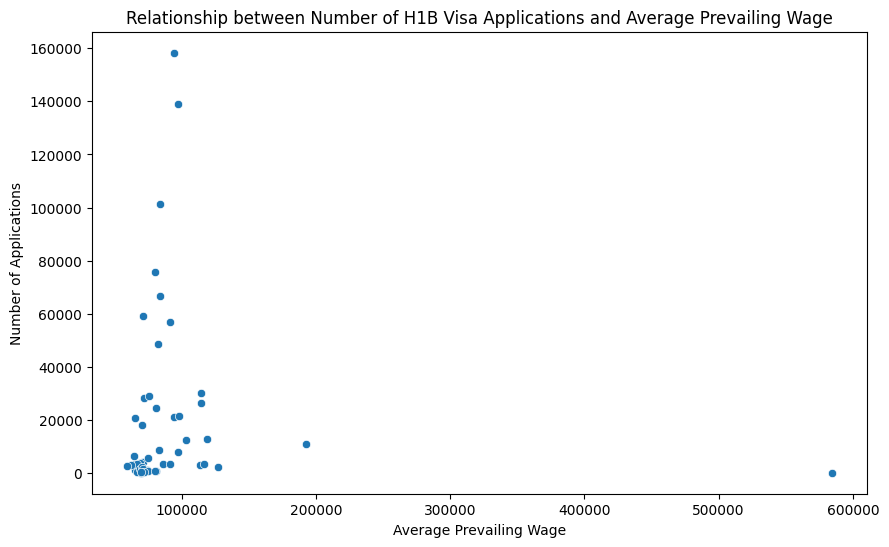

In [4]:
# Create a scatter plot to show the relationship between the number of H1B visa applications and the average salary (using Prevailing Wage)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.groupby('State')['PREVAILING_WAGE'].mean(), y=df.groupby('State')['CASE_STATUS'].count())
plt.title('Relationship between Number of H1B Visa Applications and Average Prevailing Wage')
plt.xlabel('Average Prevailing Wage')
plt.ylabel('Number of Applications')
plt.savefig('wage_vs_applications_scatter_plot.png')

In [5]:
# Create an interactive map using Plotly to show the distribution of H1B visa applications
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='CASE_STATUS', radius=10, 
                         center=dict(lat=40, lon=-100), zoom=4, 
                         mapbox_style='open-street-map')
fig.update_layout(title='Distribution of H1B Visa Applications')
fig.write_html('h1b_distribution_map.html')

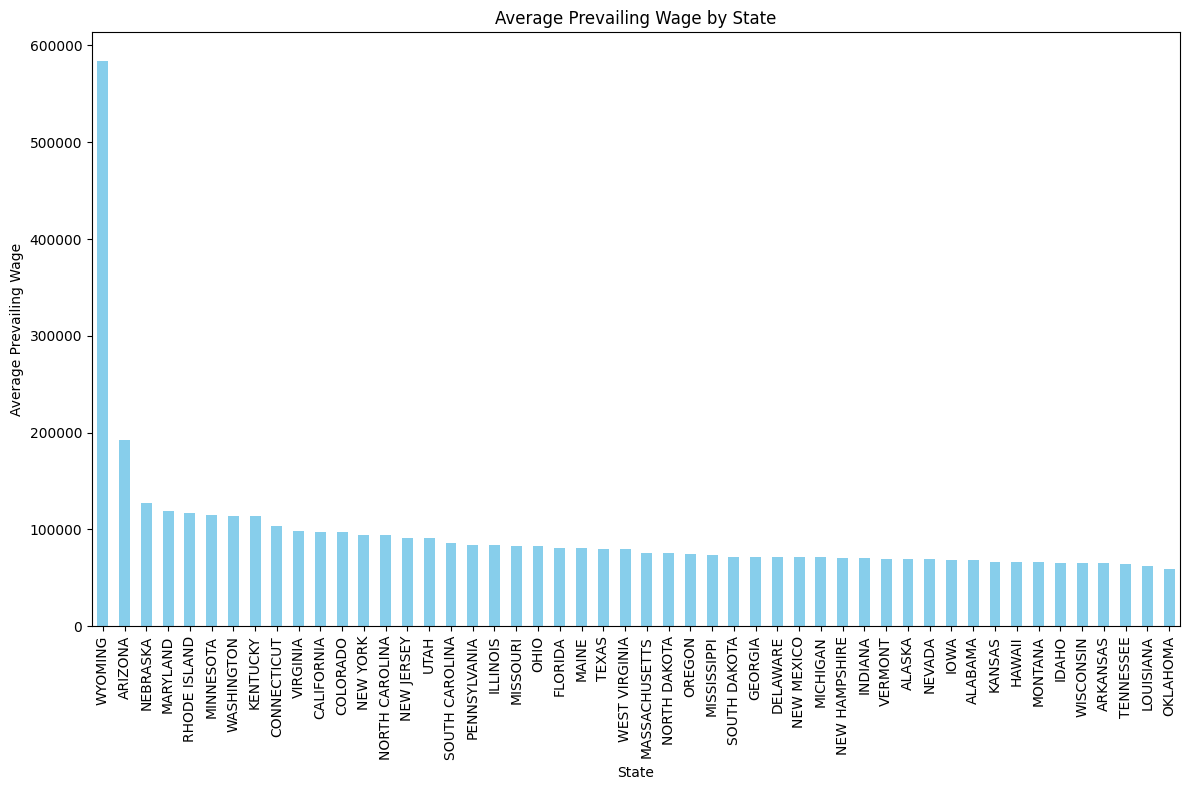

In [8]:
salary_df = df.groupby('State')['PREVAILING_WAGE'].mean().sort_values(ascending=False)
salary_df.plot(kind='bar', color='skyblue', figsize=(12, 8))
plt.title('Average Prevailing Wage by State')
plt.ylabel('Average Prevailing Wage')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('states_wage_barplot.png')
plt.show()

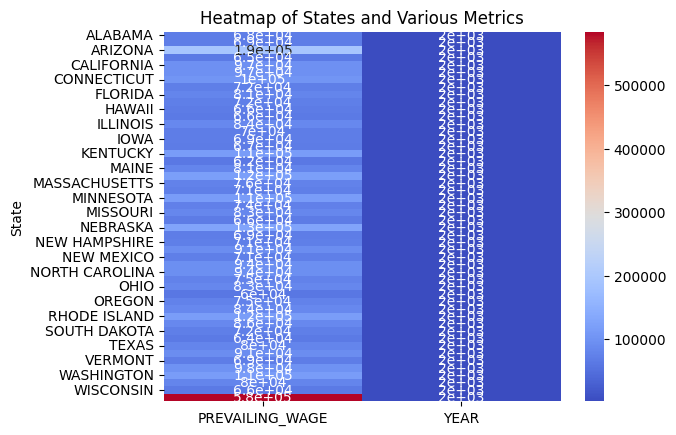

In [12]:
# Example of creating a DataFrame with multiple features
multi_feature_df = df.groupby('State').agg({
    'PREVAILING_WAGE': 'mean',
    'YEAR': 'mean'  # Add more metrics if available
}).dropna()

# Create a heatmap
sns.heatmap(multi_feature_df, cmap='coolwarm', annot=True)
plt.title('Heatmap of States and Various Metrics')
plt.savefig('states_wage_multi_feature_heatmap.png')
plt.show()


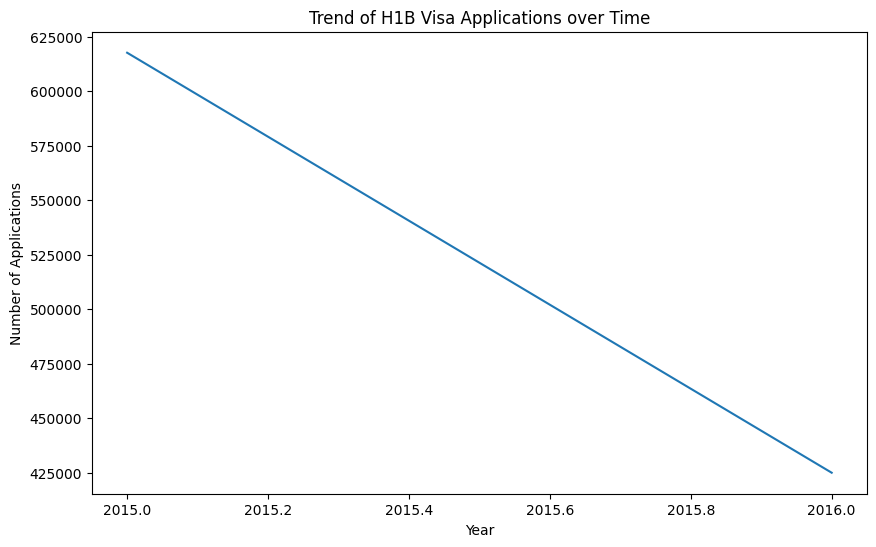

In [13]:
#Create a line graph to show the trend of H1B visa applications over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.groupby('YEAR')['CASE_STATUS'].count().reset_index(), x='YEAR', y='CASE_STATUS')
plt.title('Trend of H1B Visa Applications over Time')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.savefig('h1b_applications_trend_line_graph.png')

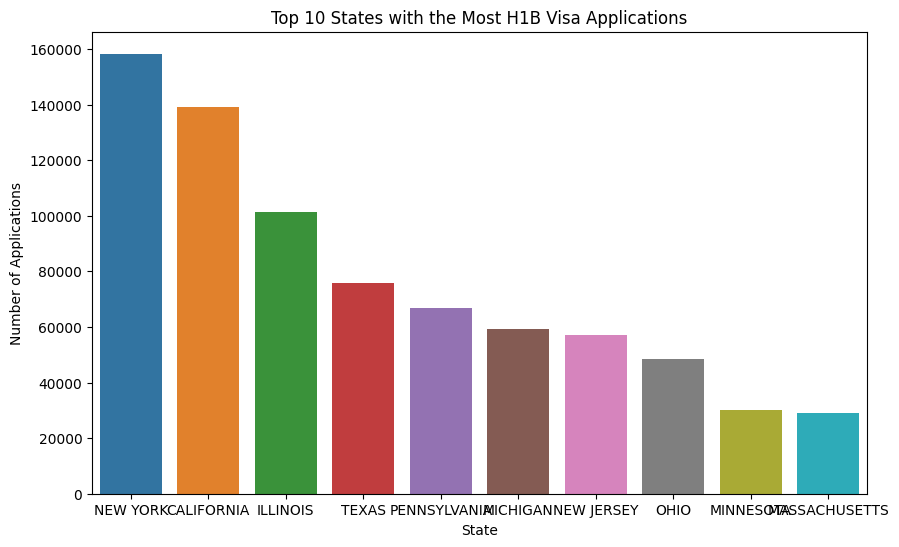

In [14]:
# Create a bar chart to show the top 10 states with the most H1B visa applications
top_states = df.groupby('State')['CASE_STATUS'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 States with the Most H1B Visa Applications')
plt.xlabel('State')
plt.ylabel('Number of Applications')
plt.savefig('top_states_bar_chart.png')

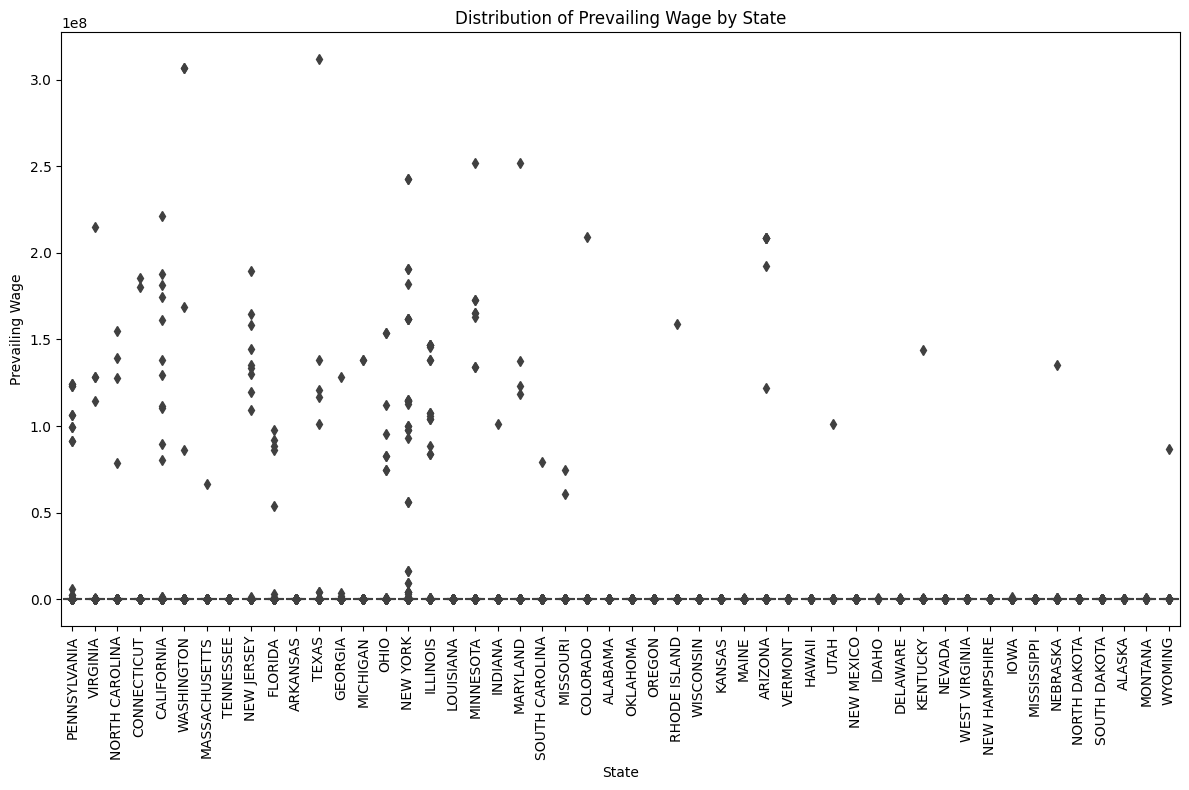

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='State', y='PREVAILING_WAGE', data=df, palette='coolwarm')
plt.title('Distribution of Prevailing Wage by State')
plt.ylabel('Prevailing Wage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('states_wage_boxplot.png')
plt.show()

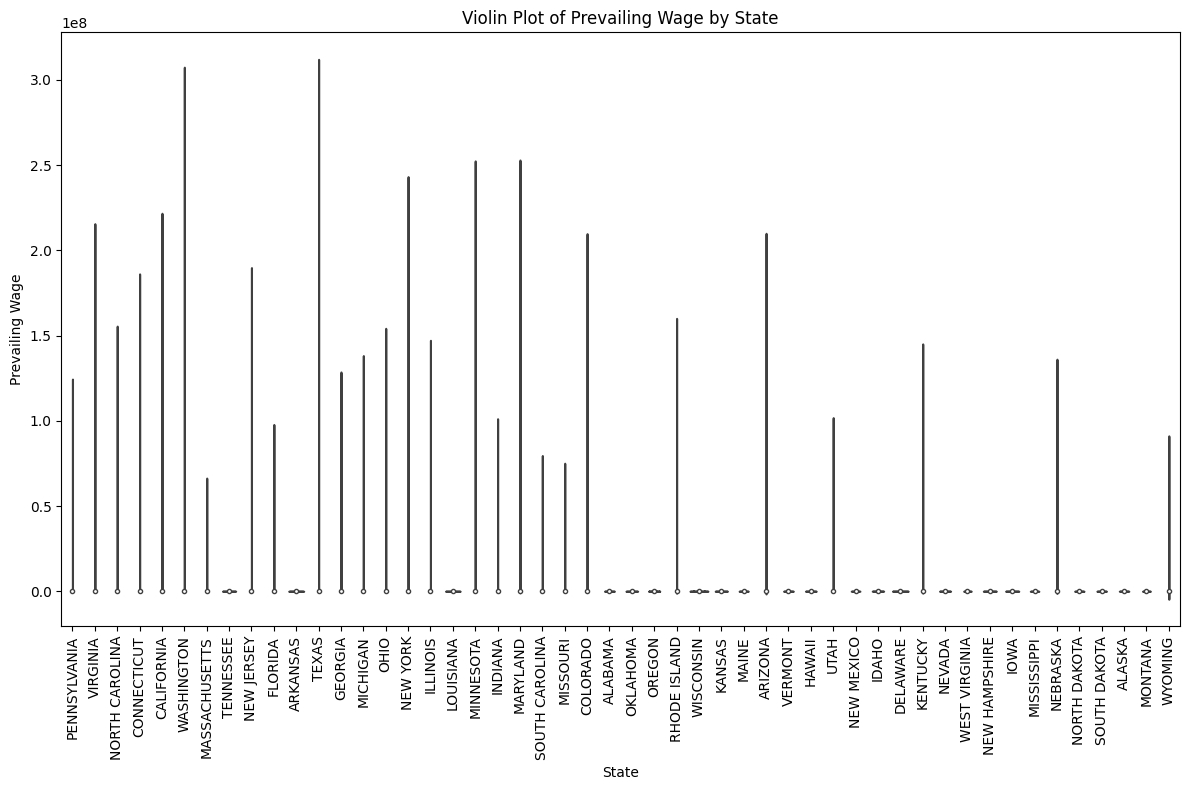

In [16]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='State', y='PREVAILING_WAGE', data=df, palette='coolwarm')
plt.title('Violin Plot of Prevailing Wage by State')
plt.ylabel('Prevailing Wage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('states_wage_violinplot.png')
plt.show()